In [628]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [629]:
# official final rankings in D3 National Championships
final_rankings = [
    "MIT", "U. of Chicago", "Williams", "NYU", "Johns Hopkins", "Colorado College", "Emory", "Washington and Lee", "SUNY Geneseo", "Washington U.", "Claremont-Mudd-Scripps", "RPI", "Wis.-La Crosse", "Amherst", "Calvin", "Tufts", "St. Olaf", "Carleton", "UC Santa Cruz", "Vassar", "George Fox", "Middlebury", "Connecticut College", "Wesleyan", "Carnegie Mellon", "Wartburg", "Lynchburg", "Trine", "DePauw", "Pomona-Pitzer", "Coast Guard", "Rowan"
]
# given two lists of rankings, find the mean squared error of their positions 
def compare_lists(list1, list2):
    schools = set(list1 + list2)
    se = []
    # return number of schools in both lists
    # return stats.spearmanr(list1, list2)[0]
    return len(set(list1).intersection(set(list2)))/len(schools)



    # for school in schools:
    #     if school in list1 and school in list2:
    #         se.append((list1.index(school) - list2.index(school)) ** 2)
    # return np.sqrt(sum(se)) / len(schools)


In [630]:
adj = pd.read_csv("./running_all_d3.csv", header=0)
labels = adj.columns.tolist()
A = adj.values

In [631]:
C = pd.read_csv("./running_counting_races.csv", header=0)
counts = C['n']
labels_temp = C['Team']
race_count_dict = {}
for i in range(len(labels_temp)):
    race_count_dict[labels_temp[i]] = labels_temp[i]

avg_place_dict = {}
P = pd.read_csv("./running_counting_places.csv", header=0)
for label in labels_temp:
    # filter for rows with the current label
    df = P[P['Team'] == label]
    # calculate the average of the 'PL' column
    avg_place = df['PL'].mean()
    # add the average place to the dictionary
    avg_place_dict[label] = avg_place

In [632]:
L = pd.read_csv("./running_all_d3_diff.csv", header=0)
# nan to 0
L = L.fillna(0)
L = L.to_numpy()
# # see if L contains any NaN values
# if np.isnan(L).any():
#     print("L contains NaN values")

In [633]:
G = nx.DiGraph()
for i, u in enumerate(labels):
    for j, v in enumerate(labels):
        w = A[i, j]
        if w != 0:
            G.add_edge(u, v, weight=w)

In [634]:
def springRank(G, nodelist, alpha=0.1, change_adj = False,change_minus_one=False):

    if change_adj:
        adj = pd.read_csv("./running_all_d3_diff.csv", header=0)
        A = adj.values
    else: #just use what we already have 
        A = nx.to_numpy_array(G, nodelist=nodelist, weight='weight')

    k_in = np.sum(A, axis=0)
    # k_in = np.zeros(len(A))

    # for i in range(A.shape[0]):
    #     total = 0
    #     for j in range(len(A[i])): 
    #         total += A[j][i] 
    #     k_in[i] = total
        



    k_out = np.sum(A, axis=1)
    # k_out = np.zeros(len(A))
    # for i in range(A.shape[0]):
    #     total = 0
    #     for j in range(len(A[i])): 
    #         total += A[i][j]
    #     k_out[i] = total


    new_sub = np.zeros(len(A))
    for i in range(len(A)):
        for j in range(len(A[i])):
            if change_minus_one:
                new_sub[i] += L[j][i]*(A[j][i] - A[i][j])
            else:
                new_sub[i] += (A[j][i] - A[i][j])

            # new_sub[i] += (A[j][i] - A[i][j])
    

    Kin = np.diag(k_in)
    Kout = np.diag(k_out)


    sub = k_in - k_out

    M = Kout + Kin - (A + A.T) + alpha * np.identity(len(nodelist))
    b = (new_sub)

    s = np.linalg.solve(M, b)

    return dict(zip(nodelist, s))

In [635]:
alpha = 0.1
raw_scores = springRank(G, labels, alpha)
scores = np.array([ raw_scores[node] for node in labels ])
scores_norm = (scores - scores.min()) / (scores.max() - scores.min() + 1e-9)


In [636]:
# plt.figure(figsize=(10, 8))
# pos = nx.kamada_kawai_layout(G, scale=2)
# nodes = nx.draw_networkx_nodes(
#     G, 
#     pos,
#     nodelist=labels,
#     node_color=scores_norm,
#     cmap=plt.cm.viridis,
#     node_size=100 + 300 * scores_norm,
#     alpha=0.9
# )
# nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=12, width=1)
# nx.draw_networkx_labels(G, pos, font_size=8)
# plt.colorbar(nodes, label="Normalized SpringRank")
# plt.title("SpringRank Visualization", fontsize=12)
# plt.axis('off')
# plt.tight_layout()
# plt.show()

In [637]:
pr = dict(zip(labels, scores_norm))

sorted_list = sorted(pr.items(), key=lambda x: x[1], reverse=True)
#   # get the ordered list

print("Ranked Schools:")

for i, (school, score) in enumerate(sorted_list, start=1):
    print(f"{i}. {school} - {score:.4f}")


Ranked Schools:
1. Amherst - 1.0000
2. U. of Chicago - 0.9875
3. NYU - 0.9796
4. Claremont-Mudd-Scripps - 0.9772
5. Williams - 0.9686
6. RPI - 0.9405
7. Washington U. - 0.9280
8. MIT - 0.9268
9. George Fox - 0.9184
10. Pomona-Pitzer - 0.9119
11. Middlebury - 0.9054
12. Emory - 0.8916
13. Colorado College - 0.8878
14. Vassar - 0.8875
15. Wartburg - 0.8841
16. Wis.-La Crosse - 0.8812
17. SUNY Geneseo - 0.8712
18. UC Santa Cruz - 0.8688
19. Tufts - 0.8622
20. St. Olaf - 0.8616
21. Augustana (Ill.) - 0.8594
22. Carnegie Mellon - 0.8502
23. Loras - 0.8480
24. Carleton - 0.8451
25. Washington and Lee - 0.8422
26. Wis.-Whitewater - 0.8420
27. Calvin - 0.8401
28. Wis.-Eau Claire - 0.8258
29. John Carroll - 0.8117
30. Johns Hopkins - 0.8081
31. Coast Guard - 0.8078
32. Lynchburg - 0.8002
33. Central College - 0.7945
34. Gettysburg - 0.7902
35. Wis.-Oshkosh - 0.7728
36. DePauw - 0.7698
37. Trine - 0.7656
38. Wittenberg - 0.7634
39. Hamilton - 0.7629
40. Allegheny - 0.7622
41. Grove City - 0.7620

In [638]:
ordered = []

for i in range(len(final_rankings)):
    ordered.append(sorted_list[i][0])
compare_lists(final_rankings, ordered)
    

0.7297297297297297

Text(0.5, 0.98, 'SpringRank Centrality')

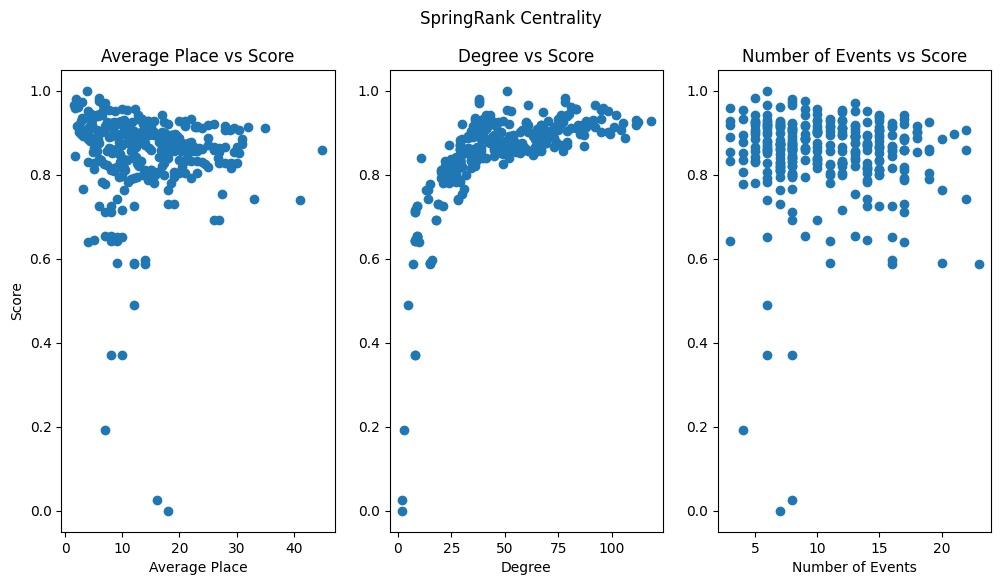

In [ ]:
# get school stats
# get node with label "MIT"
# G.nodes.items()
# raw_scores = nx.katz_centrality(G, max_iter=100000)
# raw_scores = nx.pagerank()
raw_scores = springRank(G, labels, alpha, change_minus_one=False)
# print(raw_scores)
# # raw_scores = nx.eigenvector_centrality(G)
scores = np.array([ raw_scores[node] for node in labels ])
pr = dict(zip(labels, scores_norm))
sorted_list = sorted(pr.items(), key=lambda x: x[1], reverse=True)
# print("Ranked Schools:")
# for i, (school, score) in enumerate(sorted_list, start=1):
#     print(f"{i}. {school} - {score:.4f}")

# school = "NYU"
# print(G.degree()[school], race_count_dict[school], avg_place_dict[school])

# school = "MIT"
# print(G.degree()[school], race_count_dict[school], avg_place_dict[school])

# school = "Amherst"
# print(G.degree()[school], race_count_dict[school], avg_place_dict[school])

degree_list = [G.degree()[school] for school in labels if school in G.nodes()]
avg_place = [avg_place_dict[school] for school in labels if school in G.nodes()]
num_of_events = [len(race_count_dict[school]) for school in labels if school in G.nodes()]
# plt.plot(degree_list, scores, 'o')
scores_norm = (scores - scores.min()) / (scores.max() - scores.min() + 1e-9)
# side by side plots
fig, axs = plt.subplots(1, 3, figsize=(12, 6))
axs[0].plot(avg_place, scores_norm, 'o')
# axs[0].title('Average Place vs Score')
axs[0].set_ylabel('Score')
axs[0].set_title('Average Place vs Score')
axs[0].set_xlabel('Average Place')

axs[1].plot(degree_list, scores_norm, 'o')
axs[1].set_title('Degree vs Score')
axs[1].set_xlabel('Degree')

axs[2].plot(num_of_events, scores_norm, 'o')

axs[2].set_title('Number of Events vs Score')
axs[2].set_xlabel('Number of Events')


# axs[0].ylabel('Score')

# fig.suptitle('SpringRank (Change Tension) Centrality')
fig.suptitle('SpringRank Centrality')
# node
# node = G.nodes["MIT"]
# get degree
# degree = G.degree(node)
# degree
# ordered = []

# for i in range(len(final_rankings)):
#     ordered.append(sorted_list[i][0])
# compare_lists(final_rankings, ordered)
    

    